In [1]:
import pandas as pd
# import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [2]:
# os.listdir()
# now_path = os.getcwd()
# now_path

In [175]:
sample_sub_df = pd.read_csv("../data/sample_submission.csv")
train_df = pd.read_csv("../data/train.csv", parse_dates=['release_date'])
test_df = pd.read_csv("../data/test.csv", parse_dates=['release_date'])

In [150]:
train_df.dtypes

id                                int64
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
Keywords                         object
cast                             object
crew                             object
revenue                           int64
dtype: object

In [151]:
# train_df['release_date'] = pd.to_datetime(train_df['release_date'], format="%m/%d/%y")

In [152]:
train_df['year'] = [train_df.iloc[i]['release_date'].year for i in range(len(train_df))]
train_df['month'] = [train_df.iloc[i]['release_date'].month for i in range(len(train_df))]
train_df['day'] = [train_df.iloc[i]['release_date'].day for i in range(len(train_df))]

In [153]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,year,month,day
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,20
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,6
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,10
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,9
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,5


In [154]:
test_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2007-07-14,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1997-05-23,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2010-09-04,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-02-11,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [155]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'year', 'month', 'day'],
      dtype='object')

In [156]:
test_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')

In [157]:
train_df.shape, test_df.shape

((3000, 26), (4398, 22))

In [158]:
pd.DataFrame(train_df.corr()['revenue'])

,revenue
id,0.000610
budget,0.752965
popularity,0.461460
runtime,0.216380
revenue,1.000000
year,0.020593
month,0.020164
day,0.045699


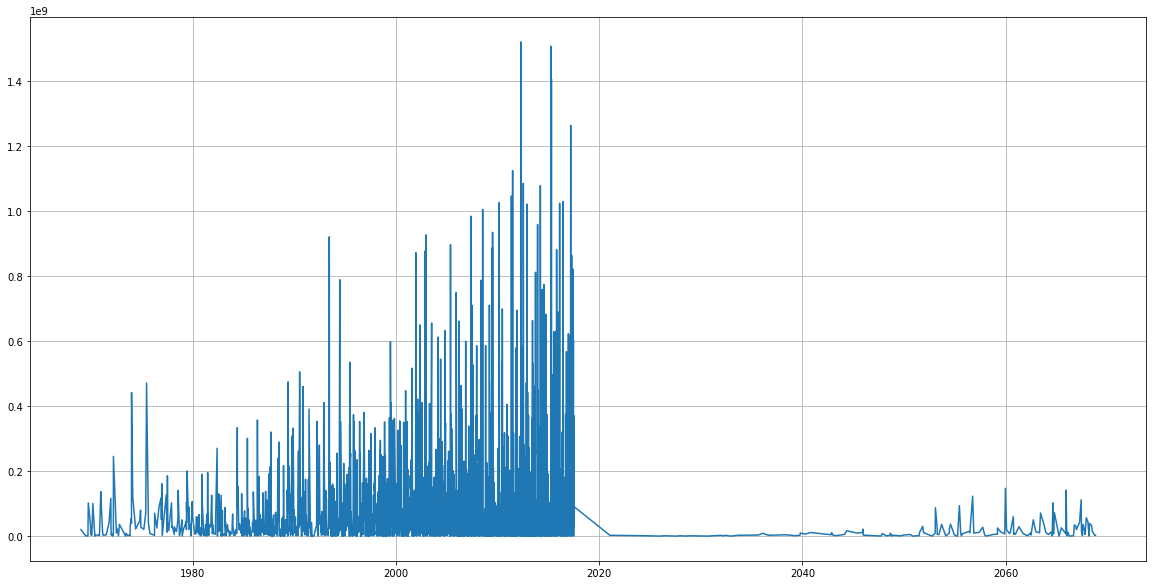

In [159]:
df = train_df.groupby(['release_date'])['revenue'].sum()
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(df)

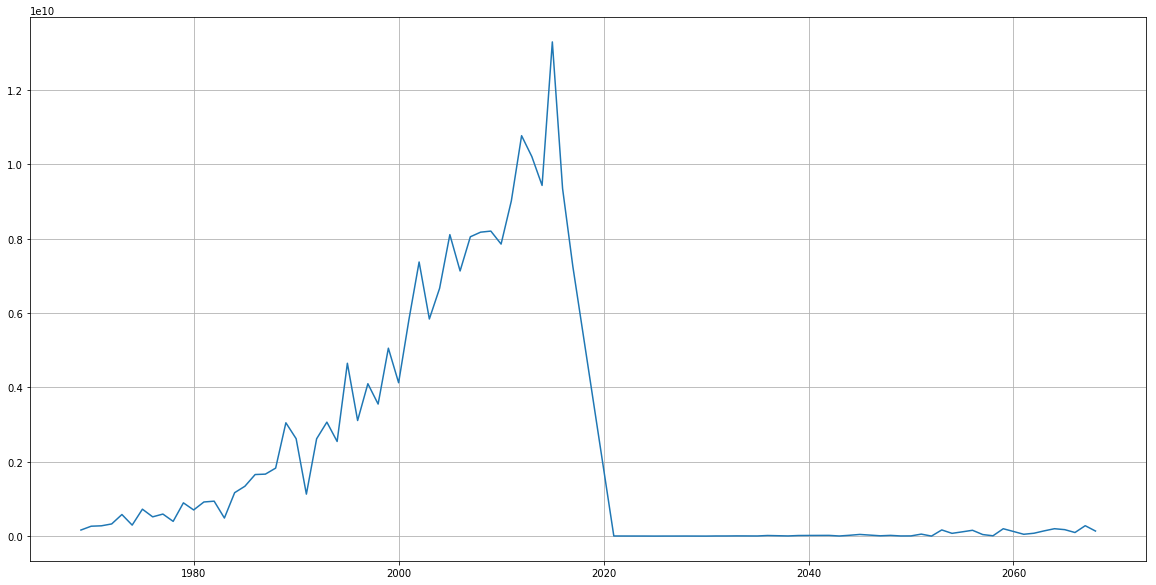

In [160]:
df = train_df.groupby(['year'])['revenue'].sum()
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(df)

In [161]:
train_df.sort_values(by=['release_date'], ascending=False)[:1]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,year,month,day
2649,2650,NaN,1455000,"[{'id': 37, 'name': 'Western'}]",NaN,tt0063592,en,Shalako,"Sean Connery is Shalako, a guide in the old We...",6.229674,...,Released,Sean Connery is Shalako! Shalako means action!...,Shalako,"[{'id': 10322, 'name': 'native american'}, {'i...","[{'cast_id': 3, 'character': ""Moses Zebulon 'S...","[{'credit_id': '52fe47029251416c9106740b', 'de...",2620000,2068,11,6


In [162]:
train_df.sort_values(by=['release_date'], ascending=True)[:1]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,year,month,day
544,545,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0065054,en,Sweet Charity,Taxi dancer Charity continues to have Faith in...,0.537378,...,Released,Love is what it's all about!,Sweet Charity,"[{'id': 978, 'name': 'broken engagement'}, {'i...","[{'cast_id': 2, 'character': 'Charity', 'credi...","[{'credit_id': '52fe460dc3a36847f80e9a35', 'de...",20000000,1969,1,1


In [163]:
pd.DataFrame(train_df.groupby(['year'])['revenue'].sum()).sort_values(by=['revenue'], ascending=False)[:5]

,revenue
year,
2015,13293335806
2012,10770751722
2013,10208471341
2014,9432880004
2016,9348124945


In [164]:
pd.DataFrame(train_df[train_df['year']>=2016].groupby(['year'])['revenue'].sum()).sort_values(by=['year'], ascending=True)[:5]

,revenue
year,
2016,9348124945
2017,7256157404
2021,2500000
2024,1213880
2025,45101


In [165]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'year', 'month', 'day'],
      dtype='object')

In [166]:
train_df.sort_values(by=['release_date'], ascending=False)[:5]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,year,month,day
2649,2650,NaN,1455000,"[{'id': 37, 'name': 'Western'}]",NaN,tt0063592,en,Shalako,"Sean Connery is Shalako, a guide in the old We...",6.229674,...,Released,Sean Connery is Shalako! Shalako means action!...,Shalako,"[{'id': 10322, 'name': 'native american'}, {'i...","[{'cast_id': 3, 'character': ""Moses Zebulon 'S...","[{'credit_id': '52fe47029251416c9106740b', 'de...",2620000,2068,11,6
647,648,NaN,9000000,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,tt0062711,en,Barbarella,"In the far future, a highly sexual woman is ta...",14.304205,...,Released,See Barbarella do her thing!,Barbarella,"[{'id': 9835, 'name': 'sexual fantasy'}, {'id'...","[{'cast_id': 2, 'character': 'Barbarella', 'cr...","[{'credit_id': '52fe4491c3a36847f809d5ab', 'de...",2500000,2068,10,10
140,141,NaN,14320000,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt0063642,en,Star!,Gertrude Lawrence rises to stage stardom at th...,0.585397,...,Released,Happiness is a girl called Julie!,Star!,"[{'id': 4344, 'name': 'musical'}, {'id': 12990...","[{'cast_id': 3, 'character': 'Gertrude Lawrenc...","[{'credit_id': '52fe484bc3a36847f81602c9', 'de...",14000000,2068,7,18
2147,2148,"[{'id': 264338, 'name': ""Rosemary's Baby Colle...",3200000,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,tt0063522,en,Rosemary's Baby,A young couple moves into an infamous New York...,11.504558,...,Released,Pray for Rosemary's Baby,Rosemary's Baby,"[{'id': 8685, 'name': 'anti-christ'}, {'id': 1...","[{'cast_id': 15, 'character': 'Rosemary Woodho...","[{'credit_id': '52fe4279c3a36847f8021573', 'de...",33395426,2068,6,12
1034,1035,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0063518,en,Romeo and Juliet,Director Franco Zeffirelli's beloved version o...,6.990990,...,Released,No ordinary love story...,Romeo and Juliet,"[{'id': 255, 'name': 'male nudity'}, {'id': 16...","[{'cast_id': 6, 'character': 'Romeo', 'credit_...","[{'credit_id': '52fe4435c3a36847f80889c3', 'de...",38901218,2068,4,2


In [167]:
train_df.sort_values(by=['release_date'], ascending=True)[:5]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,year,month,day
544,545,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0065054,en,Sweet Charity,Taxi dancer Charity continues to have Faith in...,0.537378,...,Released,Love is what it's all about!,Sweet Charity,"[{'id': 978, 'name': 'broken engagement'}, {'i...","[{'cast_id': 2, 'character': 'Charity', 'credi...","[{'credit_id': '52fe460dc3a36847f80e9a35', 'de...",20000000,1969,1,1
228,229,NaN,6244087,"[{'id': 12, 'name': 'Adventure'}, {'id': 37, '...",NaN,tt0065214,en,The Wild Bunch,Aging outlaw Pike Bishop (William Holden) prep...,11.722424,...,Released,If you only want to spend two hours in a movie...,The Wild Bunch,"[{'id': 240, 'name': 'underdog'}, {'id': 642, ...","[{'cast_id': 16, 'character': 'Pike Bishop', '...","[{'credit_id': '52fe4254c3a36847f8015e73', 'de...",638641,1969,6,17
500,501,NaN,0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",NaN,tt0064040,fr,L'Armée des ombres,"Betrayed by an informant, Philippe Gerbier (Li...",7.872569,...,Released,Betrayal. Loyalty. Collaboration. Resistance.,Army of Shadows,"[{'id': 90, 'name': 'paris'}, {'id': 1631, 'na...","[{'cast_id': 2, 'character': 'Philippe Gerbier...","[{'credit_id': '52fe46549251416c75074e6f', 'de...",741766,1969,9,10
1471,1472,NaN,6000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,tt0064115,en,Butch Cassidy and the Sundance Kid,"In late 1890s Wyoming, Butch Cassidy is the af...",6.714577,...,Released,"Not that it matters, but most of it is true.",Butch Cassidy and the Sundance Kid,"[{'id': 1016, 'name': 'wyoming'}, {'id': 6165,...","[{'cast_id': 17, 'character': 'Butch Cassidy',...","[{'credit_id': '52fe4263c3a36847f801a7f5', 'de...",102308889,1969,9,23
2318,2319,NaN,24000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,tt0064418,en,"Hello, Dolly!","Matchmaker, Dolly Levi takes a trip to Yonkers...",8.407519,...,Released,NaN,"Hello, Dolly!","[{'id': 10181, 'name': 'based on play or music...","[{'cast_id': 1, 'character': 'Dolly Levi', 'cr...","[{'credit_id': '52fe45c59251416c75061e71', 'de...",33208099,1969,12,12


In [168]:
train_df[train_df['release_date']>'2019-01-01']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,year,month,day
39,40,NaN,3800000,"[{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...",NaN,tt0059418,en,Major Dundee,"During the last winter of the Civil War, caval...",3.055936,...,Released,NaN,Major Dundee,"[{'id': 534, 'name': 'mexico'}, {'id': 1968, '...","[{'cast_id': 1, 'character': 'Major Amos Charl...","[{'credit_id': '52fe45f5c3a368484e078d7b', 'de...",14873,2065,4,7
41,42,NaN,3000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0061512,en,Cool Hand Luke,When petty criminal Luke Jackson is sentenced ...,9.718713,...,Released,What we've got here is failure to communicate.,Cool Hand Luke,"[{'id': 378, 'name': 'prison'}, {'id': 526, 'n...","[{'cast_id': 13, 'character': 'Luke Jackson', ...","[{'credit_id': '52fe428ac3a36847f8026d8d', 'de...",16217773,2067,6,22
51,52,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,...,Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333,2065,7,1
61,62,NaN,4000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0049875,en,Trapeze,"A pair of men try to perform the dangerous ""tr...",1.801071,...,Released,High...High...High...Above Them All! - in exci...,Trapeze,"[{'id': 291, 'name': 'circus'}, {'id': 180181,...","[{'cast_id': 2, 'character': 'Mike Ribble', 'c...","[{'credit_id': '52fe4594c3a36847f80cf3b9', 'de...",14400000,2056,5,30
68,69,NaN,2000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0056592,en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",14.284787,...,Released,NaN,To Kill a Mockingbird,"[{'id': 577, 'name': 'black people'}, {'id': 8...","[{'cast_id': 8, 'character': 'Atticus Finch', ...","[{'credit_id': '52fe4259c3a36847f801770d', 'de...",13129846,2062,12,25
109,110,NaN,15000000,"[{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...",NaN,tt0060491,en,Hawaii,"Abner Hale, a rigid and humorless New England ...",3.210693,...,Released,James Michener's novel reaches the screen.,Hawaii,"[{'id': 1668, 'name': 'hawaii'}, {'id': 6917, ...","[{'cast_id': 4, 'character': 'Jerusha Bromley'...","[{'credit_id': '557ffdd79251412f120015ee', 'de...",34562222,2066,10,10
140,141,NaN,14320000,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt0063642,en,Star!,Gertrude Lawrence rises to stage stardom at th...,0.585397,...,Released,Happiness is a girl called Julie!,Star!,"[{'id': 4344, 'name': 'musical'}, {'id': 12990...","[{'cast_id': 3, 'character': 'Gertrude Lawrenc...","[{'credit_id': '52fe484bc3a36847f81602c9', 'de...",14000000,2068,7,18
144,145,NaN,4000000,"[{'id': 27, 'name': 'Horror'}, {'id': 80, 'nam...",NaN,tt0062467,en,Wait Until Dark,"After a flight back home, Sam Hendrix returns ...",6.216637,...,Released,A blind woman plays a deadly game of survival.,Wait Until Dark,"[{'id': 1003, 'name': 'photographer'}, {'id': ...","[{'cast_id': 1, 'character': 'Susy Hendrix', '...","[{'credit_id': '52fe44109251416c75027a77', 'de...",11000000,2067,10,26
172,173,"[{'id': 434270, 'name': 'Lew Harper Collection...",3500000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0060490,en,Harper,Harper is a cynical private eye in the best tr...,8.559310,...,Released,Harper takes a case - and the payoff is murder.,Harper,"[{'id': 185525, 'name': 'private eye'}, {'id':...","[{'cast_id': 4, 'character': 'Lew Harper', 'cr...","[{'credit_id': '54f2b14f9251416b350032be', 'de...",12000000,2066,2,23
187,188,NaN,259000,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,tt0019563,en,West of Zanzibar,Silent film (with musical score) about the ven...,0.722511,...,Released,NaN,West of Zanzibar,"[{'id': 2343, 'name'

In [169]:
test_df[test_df['release_date']>'2019-01-01']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
46,3047,NaN,0,"[{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...",NaN,tt0037382,en,To Have and Have Not,A Martinique charter boat skipper gets mixed u...,10.003167,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2044-10-11,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,TALK ABOUT T.N.T.! THIS is IT!,To Have and Have Not,"[{'id': 1495, 'name': 'fishing'}, {'id': 2041,...","[{'cast_id': 1, 'character': 'Steve Morgan', '...","[{'credit_id': '52fe4446c3a368484e019ebd', 'de..."
83,3084,NaN,337,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,tt0019195,en,The Mysterious Lady,A beautiful Russian spy seduces an Austrian mi...,0.765930,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2028-08-04,89.0,NaN,Released,GRETA GARBO AND CONRAD NAGEL The Screen's Newe...,The Mysterious Lady,"[{'id': 154802, 'name': 'silent film'}, {'id':...","[{'cast_id': 1, 'character': 'Tania Fedorova',...","[{'credit_id': '5555cd0dc3a3687772002448', 'de..."
95,3096,NaN,2361000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,tt0036628,en,Bathing Beauty,A big splash in her first starring role: Esthe...,0.789574,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2044-07-01,101.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,M.G.M's Mammoth Technicolor Musical Spectacle!,Bathing Beauty,"[{'id': 4344, 'name': 'musical'}, {'id': 7665,...","[{'cast_id': 2, 'character': 'Steve Elliott', ...","[{'credit_id': '553d4d9192514135c8004825', 'de..."
103,3104,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,tt0061595,en,Double Trouble,When singer Gut Lambert goes on tour in Europe...,0.535616,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2067-04-05,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,ELVIS with songs and adventures in mad mod Eur...,Double Trouble,"[{'id': 4048, 'name': 'musician'}, {'id': 5694...","[{'cast_id': 1, 'character': 'Guy Lambert', 'c...","[{'credit_id': '598cc8189251414c03000310', 'de..."
114,3115,NaN,5115000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",NaN,tt0060397,en,Fantastic Voyage,The science of miniaturization has been unlock...,12.538410,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2066-08-24,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Fantastic and Spectacular Voyage... Through ...,Fantastic Voyage,"[{'id': 339, 'name': 'submarine'}, {'id': 732,...","[{'cast_id': 11, 'character': 'Grant', 'credit...","[{'credit_id': '52fe433cc3a36847f8044a6f', 'de..."
119,3120,NaN,92620000,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,tt0017136,de,Metropolis,In a futuristic city sharply divided between t...,14.487867,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2027-01-10,153.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,There can be no understanding between the hand...,Metropolis,"[{'id': 312, 'name': 'man vs machine'}, {'id':...","[{'cast_id': 10, 'character': 'Maria', 'credit...","[{'credit_id': '52fe420fc3a36847f8000c55', 'de..."
120,3121,"[{'id': 158391, 'name': 'The Apu Collection', ...",0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0052572,bn,অপুর সংসার,Apu is a jobless ex-student dreaming vaguely o...,2.381806,...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2059-05-01,117

In [170]:
pd.DataFrame(train_df.isnull().mean())
# belongs_to_collection과 homepage는 null값이 많으므로 feature 자체를 삭제

,0
id,0.000000
belongs_to_collection,0.798667
budget,0.000000
genres,0.002333
homepage,0.684667
imdb_id,0.000000
original_language,0.000000
original_title,0.000000
overview,0.002667
popularity,0.000000


In [355]:
train_prepro_data = train_df.copy()

In [356]:
del train_prepro_data['belongs_to_collection'] # null값이 전체의 80%
del train_prepro_data['homepage'] # null값이 전체의 68%
del train_prepro_data['runtime'] # corr의 수가 0.239114
train_prepro_data = train_prepro_data.dropna(axis=0).reset_index()
del train_prepro_data['index']

In [181]:
import json

In [182]:
train_prepro_data['genres'][0]

"[{'id': 35, 'name': 'Comedy'}]"

In [183]:
train_prepro_data.shape

(2229, 20)

In [184]:
train_prepro_data.corr()

,id,budget,popularity,revenue
id,1.000000,0.024010,0.000303,0.004478
budget,0.024010,1.000000,0.311573,0.741928
popularity,0.000303,0.311573,1.000000,0.444178
revenue,0.004478,0.741928,0.444178,1.000000


In [99]:
train_prepro_data.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast',
       'crew', 'revenue', 'year', 'month', 'day'],
      dtype='object')

In [315]:
genres_df = pd.DataFrame(train_prepro_data['genres'].copy())
production_companies_df = pd.DataFrame(train_prepro_data['production_companies'].copy())
production_countries_df = pd.DataFrame(train_prepro_data['production_countries'].copy())
spoken_languages_df = pd.DataFrame(train_prepro_data['spoken_languages'].copy())
Keywords_df = pd.DataFrame(train_prepro_data['Keywords'].copy())
cast_df = pd.DataFrame(train_prepro_data['cast'].copy())
crew_df = pd.DataFrame(train_prepro_data['crew'].copy())
revenue_df = pd.DataFrame(train_prepro_data['revenue'].copy())

In [316]:
train_prepro_data.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-02-16,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
4,10,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 97}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-04-16,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Back together for the first time, again.",A Mighty Wind,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...",18750246


In [317]:
train_prepro_data['original_language'].unique()

array(['en', 'sr', 'fr', 'it', 'es', 'cn', 'zh', 'ko', 'ja', 'fa', 'de',
       'pt', 'ru', 'hi', 'da', 'el', 'no', 'nb', 'ta', 'sv', 'nl', 'ml',
       'ro', 'id', 'hu'], dtype=object)

In [318]:
df = pd.Series(train_prepro_data['original_language']).astype('category')
original_language_unique= pd.DataFrame(df.cat.codes)
original_language_unique.columns = ['original_language']

In [319]:
len(pd.DataFrame(original_language_unique)['original_language'].unique())

25

In [320]:
original_language_unique.shape, revenue_df.shape

((2229, 1), (2229, 1))

In [338]:
len(pd.concat([original_language_unique, revenue_df],axis=1)['original_language'].unique())

25

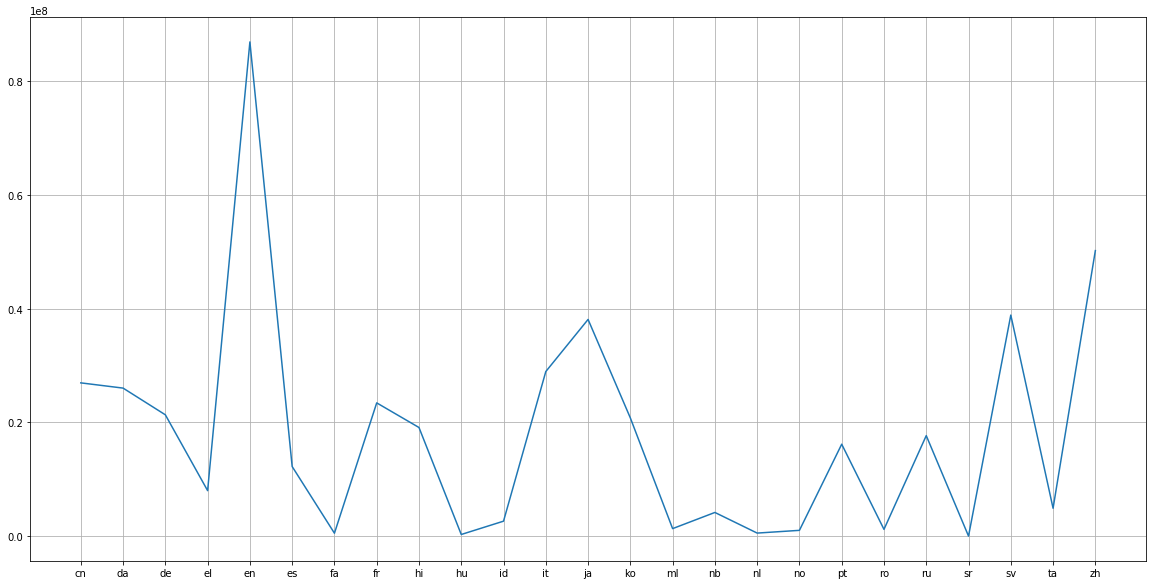

In [340]:
df = pd.concat([original_language_unique, revenue_df],axis=1)

df = pd.DataFrame(train_prepro_data.groupby(['original_language'])['revenue'].mean())
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(df)

In [346]:
df.sort_values(by=['revenue'], ascending=False)[:15]

,revenue
original_language,
en,8.696687e+07
zh,5.023854e+07
sv,3.889053e+07
ja,3.812678e+07
it,2.895550e+07
cn,2.696453e+07
da,2.604347e+07
fr,2.344289e+07
de,2.134362e+07


In [349]:
original_language_dummies = pd.get_dummies(train_prepro_data['original_language'])[['en','zh','sv','ja']]

In [362]:
train_prepro_data.shape

(2229, 23)

In [359]:
train_prepro_data = pd.concat([train_prepro_data, original_language_dummies],axis=1)

del train_prepro_data['original_language']

In [364]:
train_prepro_data

,id,budget,genres,imdb_id,original_title,overview,popularity,poster_path,production_companies,production_countries,...,tagline,title,Keywords,cast,crew,revenue,en,zh,sv,ja
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0,0
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,0,0
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,0,0,0
3,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,1,0,0,0
4,10,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 97}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"Back together for the first time, again.",A Mighty Wind,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...",18750246,1,0,0,0
5,11,1000000,"[{'id': 18, 'name': 'Drama'}]",tt0075148,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,/i5xiwdSsrecBvO7mIfAJixeEDSg.jpg,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,His whole life was a million-to-one shot.,Rocky,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",117235147,1,0,0,0
6,12,0,"[{'id': 35, 'name': 'Comedy'}]",tt0093857,Revenge of the Nerds II: Nerds in Paradise,The members of the Lambda Lambda Lambda frater...,10.543750,/1KTi0wJQfyi8YnAjuP1xQ0Hr9m4.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,They're Back!,Revenge of the Nerds II: Nerds in Paradise,"[{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...","[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033,1,0,0,0
7,13,15000000,"[{'id': 18, 'name': 'Drama'}]",tt0169547,American Beauty,"Lester Burnham, a depressed suburban father in...",20.726578,/or1MP8BZIAjqWYxPdPX724ydKar.jpg,"[{'name': 'DreamWorks SKG',

In [149]:
train_prepro_data['genres'][0]

"[{'id': 35, 'name': 'Comedy'}]"

In [ ]:
train_df['{1}'], train_df['{2}'] = train_df['genres']

In [119]:
# X_train=train_prepro_data[['budget','popularity','revenue']]
# # del train_prepro_data['genres']
# # del train_prepro_data['imdb_id']
# # del train_prepro_data['original_language']
# # del train_prepro_data['original_title']
# # del train_prepro_data['overview']
# # del train_prepro_data['poster_path']
# # del train_prepro_data['production_companies']
# # del train_prepro_data['status']
# # del train_prepro_data['tagline']
# # del train_prepro_data['title']
# # del train_prepro_data['Keywords']
# # del train_prepro_data['cast']
# # del train_prepro_data['crew']
# # del train_prepro_data['production_countries']
# # del train_prepro_data['spoken_languages']
# # del train_prepro_data['release_date']
# # del train_prepro_data['year']
# # del train_prepro_data['month']
# # del train_prepro_data['day']
# Y_train = X_train.pop('revenue')

In [120]:
# X_train=train_prepro_data[['budget','popularity']]

In [121]:
# Y_train

0        12314651
1        95149435
2        13092000
3        34327391
4        18750246
5       117235147
6        22642033
7       356296601
8        95226116
9       358372926
10            198
11       57891803
12        1234254
13        1749457
14       85167639
15      136159423
16       36690067
17         100345
18        4947717
19       13835130
20        7847000
21        5849647
22       94935764
23      426480871
24      146936910
25           7171
26      258022233
27       40346186
28         151559
29      189859560
          ...    
2199     35431113
2200    125728258
2201     57330873
2202     87840042
2203      7600000
2204      2405420
2205     87754044
2206    411006740
2207     15379253
2208      4122748
2209     10442808
2210     57881056
2211     15427192
2212     29700000
2213      1053788
2214     77477008
2215      2500000
2216    116643346
2217     14655628
2218     16605763
2219       858591
2220       100202
2221     91038276
2222      1213880
2223    21

In [123]:
# X_test = test_df[['id','budget','popularity']]

# test = X_test.reset_index()
# del test['index']
# del test['id']

# # X_test

In [124]:
x_train = X_train.as_matrix()
y_train = Y_train.as_matrix()
test_id_idx = X_test.pop('id')
x_test = test.as_matrix()

C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [125]:
x_train.shape, y_train.shape, x_test.shape, test_id_idx.shape

((2229, 2), (2229,), (4398, 2), (4398,))

# Build model

In [126]:
from sklearn import linear_model

In [127]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
# Make predictions using the testing set
submit = pd.DataFrame({'id': test_id_idx, 'revenue': regr.predict(x_test)})
submit.head()

,id,revenue
0,3001,-4.884893e+06
1,3002,-5.522761e+06
2,3003,7.598357e+06
3,3004,2.628715e+07
4,3005,-1.700147e+06


In [129]:
submit.to_csv('../result/submission_linear_regression.csv', index=False)
# basic data_set : 6.79830

In [146]:
# ! kaggle competitions submit -c tmdb-box-office-prediction -f submission_linear_regression.csv -m "basic"

'kaggle'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
